# TP: Machine Learning

## TP1: Linear Regression

Linear regression is a family of machine learning algorithms aiming at adjusting a linear model to an ensemble of data. The applications range from signal reconstruction to empirical description.

The given dataset was produced by the World Health Organization. It pooled the evolution of 20 features for 15 years and among numerous countries. One of the goals of this TP1 is to manipulate this dataset and try to predict the evolution of Life Expectancy through different variables.

**Objectives:**
- Use and setup an iPython environment
- Manipulate and visualize data
- Implement a simple linear regression
- Apply the aforementioned linear regression
- Compute a $R^2$ on the generated results
- Apply Ridge and Lasso regressions


## STEP 1: Use and setup an iPython environment

iPython and Notebook environments are useful tools to quickly prototype and test machine learning solutions. However, they have limitations especially in RAM and disk access.

In [ ]:
import shutil
import pkgutil

def show_acceptable_modules():
    line = '-' * 100
    print('{}\n{:^30}|{:^20}\n{}'.format(line, 'Module', 'Location', line))
    for entry in pkgutil.iter_modules():
        print('{:30}| {}'.format(entry[1], entry[0].path))

In [ ]:
show_acceptable_modules()

----------------------------------------------------------------------------------------------------
            Module            |      Location      
----------------------------------------------------------------------------------------------------
__future__                    | /usr/lib/python3.7
_bootlocale                   | /usr/lib/python3.7
_collections_abc              | /usr/lib/python3.7
_compat_pickle                | /usr/lib/python3.7
_compression                  | /usr/lib/python3.7
_dummy_thread                 | /usr/lib/python3.7
_markupbase                   | /usr/lib/python3.7
_osx_support                  | /usr/lib/python3.7
_py_abc                       | /usr/lib/python3.7
_pydecimal                    | /usr/lib/python3.7
_pyio                         | /usr/lib/python3.7
_sitebuiltins                 | /usr/lib/python3.7
_strptime                     | /usr/lib/python3.7
_sysconfigdata_m_linux_x86_64-linux-gnu| /usr/lib/python3.7
_sysconfigdata_m_x86_64

The last output display the module and location of each module

Which is the used Python version?

For this TP1, we will need:
- pandas
- matplotlib
- numpy
- sklearn

## STEP 2: Data manipulation and visualization


**TO DO 2.1**

Execute the following cell

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine learning/TP/Life_Expectancy_Data.csv")
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Longitude                        1649 non-null   float64
 2   Latitude                         1649 non-null   float64
 3   Continent                        1649 non-null   object 
 4   Year                             1649 non-null   int64  
 5   Status                           1649 non-null   object 
 6   Life_expectancy                  1649 non-null   float64
 7   Adult_mortality                  1649 non-null   float64
 8   Infant_deaths                    1649 non-null   int64  
 9   Alcohol                          1649 non-null   float64
 10  Percentage_expenditure           1649 non-null   float64
 11  Hepatitis_B                      1649 non-null   float64
 12  Measles             

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = df[(df.Country == "France") & (df.Year > 2010)]
print("df1: ", df1)
df2 = df[(df.Country == "France")].Year
print("df2: ", df2)

df1:      Country  Longitude  Latitude Continent  Year      Status  Life_expectancy  \
931  France  -2.761729  42.17344    Europe  2014  Developing             82.2   
932  France  -2.761729  42.17344    Europe  2013  Developing             82.0   
933  France  -2.761729  42.17344    Europe  2012  Developing             81.5   
934  France  -2.761729  42.17344    Europe  2011  Developing             81.7   

     Adult_mortality  Infant_deaths  Alcohol  ...  Polio  Total_expenditure  \
931             79.0              3     11.5  ...   98.0              11.54   
932             81.0              3     11.1  ...   99.0              11.56   
933             83.0              3     11.5  ...   99.0              11.44   
934             83.0              3     11.8  ...   99.0              11.33   

     Diphtheria  HIV_AIDS          GDP  Population  Thinness _1-19_years  \
931        98.0       0.1  42955.24287  66331957.0                   0.6   
932        99.0       0.1  42554.12250  

df1 take all the row of df which have france(in the country columns) and a  bigger value than 2010(in the year columns).

df2 take all columns of year in df which have france in the country columns

the range of life expectancy is 78.8 to 79.5

In [ ]:
df3 = df[(df.Country == "Belgium") & (df.Year>=2004) & (df.Year<=2008)].Life_expectancy
print(df3)

247    79.5
248    79.5
249    79.4
250    78.9
251    78.8
Name: Life_expectancy, dtype: float64


In [ ]:
print(df.corr())

                                 Longitude  Latitude      Year  \
Longitude                         1.000000  0.064602 -0.018635   
Latitude                          0.064602  1.000000 -0.027252   
Year                             -0.018635 -0.027252  1.000000   
Life_expectancy                  -0.192675  0.432515  0.050771   
Adult_mortality                   0.091557 -0.348847 -0.037092   
Infant_deaths                     0.140981 -0.002955  0.008029   
Alcohol                          -0.202308  0.349825 -0.113365   
Percentage_expenditure           -0.057579  0.214447  0.069553   
Hepatitis_B                       0.012114  0.060178  0.114897   
Measles                           0.168937  0.033374 -0.053822   
BMI                              -0.233330  0.268139  0.005739   
Under-five_deaths                 0.134130 -0.011890  0.010479   
Polio                            -0.002238  0.179645 -0.016699   
Total_expenditure                -0.200847  0.043328  0.059493   
Diphtheria

the least promising values to use as predictor for life expectancy is the value with the worst correlation with life expectancy value so correlation near of 0  so population value.

the most promising values to use as predictor for life expectancy is the value with the best correlation with life expectancy value so Schooling value.



Plot life expectancy against one of your chosen values.

Text(0.5, 0, 'Population')

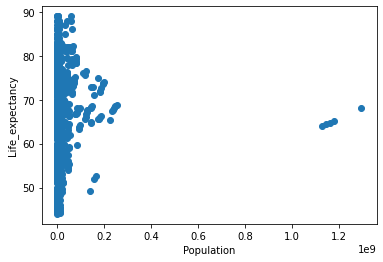

In [ ]:
plt.scatter(df.Population, df.Life_expectancy)
plt.ylabel("Life_expectancy")
plt.xlabel("Population")

Text(0.5, 0, 'Income_composition_of_resources')

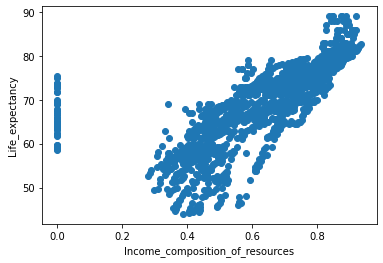

In [ ]:
plt.scatter(df.Income_composition_of_resources, df.Life_expectancy)
plt.ylabel("Life_expectancy")
plt.xlabel("Income_composition_of_resources")

## STEP 3: Simple Linear Regression

In [ ]:
import numpy as np


Select the Life Expectancy and the Income composition of resources of Belarus, Madagascar, India and Lithuania. This new Data Frame will be called df_study

In [ ]:
df_study = df[(df.Country == "Belarus") | (df.Country == "Madagascar") | (df.Country == "India") | (df.Country ==  "Lithuania")].loc[:,["Life_expectancy", "Income_composition_of_resources"]]
print(df_study)

      Life_expectancy  Income_composition_of_resources
225              72.0                            0.796
226              71.7                            0.796
227              71.9                            0.793
228              72.0                            0.787
229              73.0                            0.780
230              70.0                            0.771
231              70.0                            0.755
232              69.8                            0.739
233              68.9                            0.723
234              68.1                            0.713
235              68.2                            0.703
236              67.7                            0.695
237              67.2                            0.687
238              67.7                            0.681
239              68.0                            0.675
1187             68.0                            0.607
1188             67.6                            0.599
1189      


Implement a simple least square function and apply it on the previous selected data.

In [ ]:
def Least_square(x,y) :
    x_sum, y_sum, xy_sum, x_square_sum, y_square_sum = 0, 0, 0, 0, 0
    for i in range(len(x)):
        x_sum = x_sum + x[i]
        y_sum = y_sum + y[i]
        xy_sum = xy_sum + x[i] * y[i]
        x_square_sum = x_square_sum + x[i]**2
        y_square_sum = y_square_sum + y[i]**2

    SSxx = x_square_sum + x_sum**2 / len(x)
    SSxy = xy_sum + (x_sum * y_sum) / len(x)
    SSyy = y_square_sum + y_sum**2 / len(y)
    b1 = SSxy / SSxx
    b0 = y_sum / len(y) - b1 * x_sum / len(x)
    print(b1,b0)
    return b0 + b1 * x

In [ ]:
y = Least_square(df_study.Income_composition_of_resources.array, df_study.Life_expectancy.array)

101.79772075203776 0.9749691659913395




On the same figure, draw the line corresponding to your regression and the data points corres-
ponding to df_study

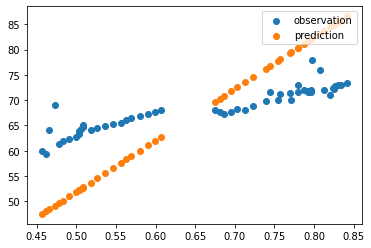

In [ ]:
plt.scatter(df_study.Income_composition_of_resources, df_study.Life_expectancy)
plt.scatter(df_study.Income_composition_of_resources,y)
plt.legend(['observation','prediction'], loc = 'upper right')


Now, implement a Gradient Descend function `def gradDescent(x, y, theta, alpha, iters)` where `x` are
the covariates, `y` the target value, `theta` the initial weights, `alpha` the learning rate and `iters` the number
of gradient descent iterations. Your function should return all intermediary values of `theta` that has been computed as a list.

In [ ]:
def gradDescent(x, y, theta, alpha, iters):
    grad = np.zeros(2, dtype = float)
    theta_hystorique = []
    for i in range(iters):
        for i in range(len(x)):
            grad[0] = grad[0] + theta[0] + x[i] * theta[1] - y[i]
            grad[1] = grad[1] + x[i]*(theta[0] + x[i] * theta[1] - y[i])

        theta = theta - alpha * 2/len(x) * grad
        theta_hystorique.append(theta)
        grad[0] = 0
        grad[1] = 0
    return theta_hystorique


Compute the gradient descend on df_study for 1000 iterations with different values of `alpha`. You
may initialize `theta` with `theta_0 = 0` and `theta_1 = 1`

In [ ]:
iters = 1000
alpha = 0.0001
theta_0 = 0.
theta_1 = 1.
theta = [theta_0, theta_1]

theta = gradDescent( df_study.Income_composition_of_resources.array,df_study.Life_expectancy.array, theta, alpha, iters)
print(theta)

[array([0.01351709, 1.00902971]), array([0.02703029, 1.01805682]), array([0.04053959, 1.02708132]), array([0.05404499, 1.03610321]), array([0.06754651, 1.0451225 ]), array([0.08104413, 1.05413918]), array([0.09453785, 1.06315326]), array([0.10802769, 1.07216474]), array([0.12151364, 1.08117362]), array([0.1349957 , 1.09017989]), array([0.14847388, 1.09918357]), array([0.16194817, 1.10818465]), array([0.17541857, 1.11718312]), array([0.18888509, 1.126179  ]), array([0.20234773, 1.13517229]), array([0.21580649, 1.14416297]), array([0.22926137, 1.15315106]), array([0.24271237, 1.16213656]), array([0.25615949, 1.17111946]), array([0.26960273, 1.18009977]), array([0.2830421 , 1.18907748]), array([0.29647759, 1.19805261]), array([0.30990922, 1.20702514]), array([0.32333696, 1.21599508]), array([0.33676084, 1.22496243]), array([0.35018085, 1.2339272 ]), array([0.36359699, 1.24288937]), array([0.37700926, 1.25184896]), array([0.39041767, 1.26080596]), array([0.4038222 , 1.26976037]), array([0.



On the same figure, plot the evolution of theta_0 through the iterations for each different values of
alpha you chose. Do the same thing for theta_1.

Text(0.5, 1.0, 'evolution of theta_0 through the iterations for each different values of alpha')

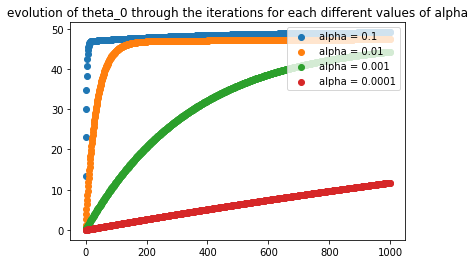

In [ ]:
iters = 1000
alpha = 0.1
theta_0 = 0.
theta_1 = 1.
theta = [theta_0, theta_1]
for i in range(4):
    theta = [theta_0, theta_1]
    theta = gradDescent( df_study.Income_composition_of_resources.array,df_study.Life_expectancy.array, theta, alpha, iters)
    y = np.zeros(len(theta),dtype = float)
    x = [j for j in range(len(theta))]
    for i in range(len(theta)):
        y[i] = theta[i][0]

    plt.scatter(x,y)
    alpha = alpha / 10
plt.legend(["alpha = 0.1","alpha = 0.01","alpha = 0.001","alpha = 0.0001"], loc = "upper right")
plt.title("evolution of theta_0 through the iterations for each different values of alpha", loc = 'center')

Text(0.5, 1.0, 'evolution of theta_1 through the iterations for each different values of alpha')

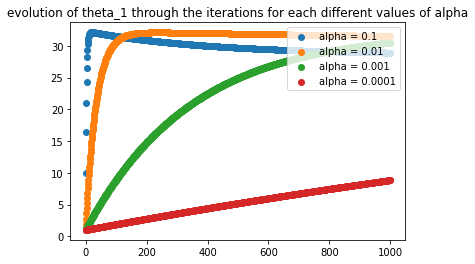

In [ ]:
iters = 1000
alpha = 0.1
theta_0 = 0.
theta_1 = 1.
theta = [theta_0, theta_1]
for i in range(4):
    theta = [theta_0, theta_1]
    theta = gradDescent(df_study.Income_composition_of_resources.array, df_study.Life_expectancy.array, theta, alpha, iters)
    y = np.zeros(len(theta),dtype = float)
    x = [j for j in range(len(theta))]
    for i in range(len(theta)):
        y[i] = theta[i][1]

    plt.scatter(x,y)
    alpha = alpha / 10
plt.legend(["alpha = 0.1","alpha = 0.01","alpha = 0.001","alpha = 0.0001"], loc = "upper right")
plt.title("evolution of theta_1 through the iterations for each different values of alpha", loc = 'center')

alpha, the step of gradient, allows us to find the minimum of our error function

$R^2$ is the coefficient of determination useful to score a regression against the ground truth data.

This coefficient can be computed with a sklearn function:

```
sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')
```

With:

**y_true** array-like of shape (n_samples,) or (n_samples, n_outputs)

Ground truth (correct) target values.

**y_pred** array-like of shape (n_samples,) or (n_samples, n_outputs)

Estimated target values.

**sample_weight** array-like of shape (n_samples,), default=None

Sample weights.

**multioutput** {‘raw_values’, ‘uniform_average’, ‘variance_weighted’}, array-like of shape (n_outputs,) or None, default=’uniform_average’

Defines aggregating of multiple output scores. Array-like value defines weights used to average scores. Default is “uniform_average”.

- ‘raw_values’: Returns a full set of scores in case of multioutput input.

- ‘uniform_average’: Scores of all outputs are averaged with uniform weight.

- ‘variance_weighted’: Scores of all outputs are averaged, weighted by the variances of each individual output.


In [ ]:
from sklearn.metrics import r2_score

**TO CODE 3.7**

Compute $R^2$ on the regression with df_study

In [ ]:
alpha = 0.1
theta_0 = 0.
theta_1 = 1.
theta = [theta_0, theta_1]
x = df_study.Income_composition_of_resources.array
y = df_study.Life_expectancy.array
theta = gradDescent(x, y, theta, alpha, iters)
b0 = theta[-1][0]
b1 = theta[-1][1]
y_pred = b1 * x + b0
print(r2_score(y, y_pred))

0.8465227575976074




The closer R² is to one, the better the model flits the data.

0.846 is near to one so the model is good



If R² has higher value than 0.846 it would be relevant regression

## STEP 4: Multivariate regression

In [ ]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

df_study = df[(df.Country == "Belarus") | (df.Country == "Madagascar") | (df.Country == "India") | (df.Country == "Lithuania")]
y = df_study.Life_expectancy
X = df_study[['Adult_mortality', 'Alcohol', 'Total_expenditure', 'Income_composition_of_resources', 'Schooling', "HIV_AIDS"]].to_numpy(dtype='float64')

alphas = 10**np.linspace(10,-2,100)*0.5

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

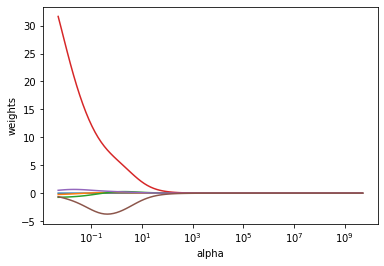

In [ ]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()


This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm.
alpha is the constant that multiplies the L2 term, controlling regularization strength.

So more alpha is bigger more the weight will converge to the fixe value


||y - Xw||^2_2 + alpha * ||w||^2_2 is the function we need to minimize

So if alpha increase, l2 will diminue

In [ ]:
ridge = Ridge(normalize = True)
ridge.set_params(alpha = 10e-3)
X = df_study[['Adult_mortality', 'Alcohol', 'Total_expenditure', 'Income_composition_of_resources', 'Schooling', "HIV_AIDS"]]
for i in range(X.shape[1]):
    if i == 0 :
        ridge.fit(X, y)
        print('number of variable:{}|coefficient:{}|score:{}'.format(X.shape[1] - i,coefs.append(ridge.coef_),r2_score(y,ridge.predict(X))))
    else :
        ridge.fit(X.iloc[:,i:], y)
        print('number of variable:{}|coefficient:{}|score:{}'.format(X.shape[1] - i,coefs.append(ridge.coef_),r2_score(y,ridge.predict(X.iloc[:,i:]))))

number of variable:6|coefficient:None|score:0.8753371733252838
number of variable:5|coefficient:None|score:0.874642825139458
number of variable:4|coefficient:None|score:0.8655965912064785
number of variable:3|coefficient:None|score:0.8476323309903743
number of variable:2|coefficient:None|score:0.8403644495260986
number of variable:1|coefficient:None|score:0.6721122220051761


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

We see the most relevant variable for Ridge is 6 because the R² metrics is the nearest of 1 (0.87) but it depent to alpha.

In [ ]:
ridge.set_params(alpha = 100e-3)
X = df_study[['Adult_mortality', 'Alcohol', 'Total_expenditure', 'Income_composition_of_resources', 'Schooling', "HIV_AIDS"]]
for i in range(X.shape[1]):
    if i == 0 :
        ridge.fit(X, y)
        print('number of variable:{}|coefficient:{}|score:{}'.format(X.shape[1] - i,coefs.append(ridge.coef_),r2_score(y,ridge.predict(X))))
    else :
        ridge.fit(X.iloc[:,i:], y)
        print('number of variable:{}|coefficient:{}|score:{}'.format(X.shape[1] - i,coefs.append(ridge.coef_),r2_score(y,ridge.predict(X.iloc[:,i:]))))

number of variable:6|coefficient:None|score:0.8523926895436367
number of variable:5|coefficient:None|score:0.8526507707775828
number of variable:4|coefficient:None|score:0.8540045074463509
number of variable:3|coefficient:None|score:0.844459183571172
number of variable:2|coefficient:None|score:0.8335862900114754
number of variable:1|coefficient:None|score:0.6666229243242399


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

for another alpha, 4 variable is more relevant

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

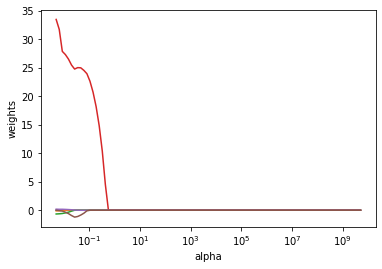

In [ ]:
lasso = Lasso(normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [ ]:
lassos = Lasso(normalize = True)
lassos.set_params(alpha = 10e-3)
for i in range(X.shape[1]):
    if i == 0 :
        lassos.fit(X, y)
        print('number of variable:{}|coefficient:{}|score:{}'.format(X.shape[1] - i,coefs.append(lassos.coef_),r2_score(y,lassos.predict(X))))
    else :
        lassos.fit(X.iloc[:,i:], y)
        print('number of variable:{}|coefficient:{}|score:{}'.format(X.shape[1] - i,coefs.append(lassos.coef_),r2_score(y,lassos.predict(X.iloc[:,i:]))))

number of variable:6|coefficient:None|score:0.8637523113955696
number of variable:5|coefficient:None|score:0.8635341726805421
number of variable:4|coefficient:None|score:0.8635341711168029
number of variable:3|coefficient:None|score:0.8479862529525245
number of variable:2|coefficient:None|score:0.8401639429603
number of variable:1|coefficient:None|score:0.6718605700886371


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

We see the most relevant variable for Lasso is 6 because the R² metrics is the nearest of 1 (0.875) but it depent to alpha.

In [ ]:
alphas = 10**np.linspace(10,-2,100)*0.5
alpha_hystorique = []
l_plus = 0
r_plus = 0
for a in alphas:
    lassos.set_params(alpha = a)
    ridge.set_params(alpha = a)
    lassos.fit(X, y)
    ridge.fit(X, y)
    lasso_score = r2_score(y,lassos.predict(X))
    ridge_score = r2_score(y,ridge.predict(X))
    if lasso_score < ridge_score:
        alpha_hystorique.append(a)
        r_plus = r_plus + 1
    if lasso_score > ridge_score :
        alpha_hystorique.append(a)
        l_plus = l_plus + 1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

In [ ]:
print('ridge modele is better {} times | lasso modele is better {} times | for {} alpha different'.format(r_plus,l_plus,len(alpha_hystorique)))
print(alpha_hystorique)

ridge modele is better 100 times | lasso modele is better 0 times | for 100 alpha different
[5000000000.0, 3782316637.773145, 2861183829.67511, 2164380640.5415306, 1637274581.438866, 1238538177.995857, 936908711.4301934, 708737081.4634038, 536133611.00516266, 405565415.3948445, 306795363.6706582, 232079441.68063864, 175559586.71075636, 132804389.1473342, 100461650.1282523, 75995554.14764665, 57487849.769886784, 43487450.13088917, 32896661.232878413, 24885117.82166057, 18824679.033962358, 14240179.342179025, 10772173.450159412, 8148754.173103217, 6164233.69721033, 4663016.734416099, 3527401.1553593227, 2668349.615603151, 2018508.6292982749, 1526927.7544167063, 1155064.850041579, 873764.2000038414, 660970.5742330144, 500000.0, 378231.66377731453, 286118.382967511, 216438.06405415307, 163727.45814388624, 123853.81779958545, 93690.87114301915, 70873.70814634024, 53613.36110051616, 40556.54153948436, 30679.536367065877, 23207.944168063863, 17555.958671075638, 13280.43891473342, 10046.165012

alpha have more influance in ridge because the part of alpha have a square while lasso have the norme 1 that is to say for alpha high ridge model is better.

for this setup we see that ridge modele is better for different value of alpha.


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df_study = df[(df.Country == "Belarus") | (df.Country == "Madagascar") | (df.Country == "India") | (df.Country == "Lithuania")]
y = df_study.Life_expectancy
X = df_study[['Adult_mortality', 'Alcohol', 'Total_expenditure', 'Income_composition_of_resources', 'Schooling', "HIV_AIDS"]].to_numpy(dtype='float64')

In [ ]:
model = LinearRegression()
model.fit(X,y)
print(model.coef_)
print(r2_score(y, model.predict(X)))

[ 2.65943031e-03 -3.17928713e-01 -7.99041602e-01  4.49600718e+01
  1.33103670e-01  1.25430166e-02]
0.8794497128525172


In [ ]:
ridge = Ridge(normalize = True)
a = 10e-3
ridge.set_params(alpha = a)
ridge.fit(X, y)
print(ridge.coef_)
print(r2_score(y, ridge.predict(X)))

[ 7.00613121e-04 -1.87499521e-01 -6.97370194e-01  2.62827337e+01
  6.22580644e-01 -9.75607070e-01]
0.8753371733252838


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [ ]:
lasso = Lasso(normalize = True)
a = 10e-3
lasso.set_params(alpha = a)
lasso.fit(X, y)
print(lasso.coef_)
print(r2_score(y, lasso.predict(X)))

[-6.21529232e-04 -0.00000000e+00 -5.25874294e-01  2.76456362e+01
  1.57633287e-01 -2.29140564e-01]
0.8637523113955696


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


In [ ]:
from sklearn.feature_selection import f_regression

f_test = f_regression(X,y)
print('the f_statistique : {} and the p-value : {}'.format(f_test[0],f_test[1]))

the f_statistique : [  3.86444214 125.09281253  36.7294203  287.05437638 261.50896011
 106.622723  ] and the p-value : [5.46696734e-02 1.89196805e-15 1.54511271e-07 8.04713883e-23
 6.21204994e-22 3.39511137e-14]


In [ ]:
f_statistique, p_value = f_test
print(f_statistique, p_value)
rank_least_most = []
for i in f_statistique:
    indice_min = f_statistique.argmin()
    rank_least_most.append(X.columns[indice_min])
    f_statistique[indice_min] = 10 + f_statistique.max()

print('\nrank of the variable from the least to the most promising : {}'.format(rank_least_most))

[477.05437638 507.05437638 487.05437638 527.05437638 517.05437638
 497.05437638] [5.46696734e-02 1.89196805e-15 1.54511271e-07 8.04713883e-23
 6.21204994e-22 3.39511137e-14]

rank of the variable from the least to the most promising : ['Adult_mortality', 'Total_expenditure', 'HIV_AIDS', 'Alcohol', 'Schooling', 'Income_composition_of_resources']
